# 1.Problem Defination

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.


# 2.Features
Following is the Data Dictionary for Credit Card dataset :-

* CUSTID : Identification of Credit Card holder (Categorical).
* BALANCE : Balance amount left in their account to make purchases. 
* BALANCEFREQUENCY : How frequently the Balance is updated, score between * and 1 (1 = frequently updated, 0 = not frequently updated). 
* PURCHASES : Amount of purchases made from account.
* ONEOFFPURCHASES : Maximum purchase amount done in one-go. 
* INSTALLMENTSPURCHASES : Amount of purchase done in installment. 
* CASHADVANCE : Cash in advance given by the user.
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid.
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced".
* PURCHASESTRX : Numbe of purchase transactions made.
* CREDITLIMIT : Limit of Credit Card for user.
* PAYMENTS : Amount of Payment done by user.
* MINIMUM_PAYMENTS : Minimum amount of payments made by user.
* PRCFULLPAYMENT : Percent of full payment paid by user.
* TENURE : Tenure of credit card service for user.

# Import libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
cc_df = pd.read_csv("data/CC GENERAL.csv", low_memory=False)

In [3]:
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
cc_df.shape

(8950, 18)

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

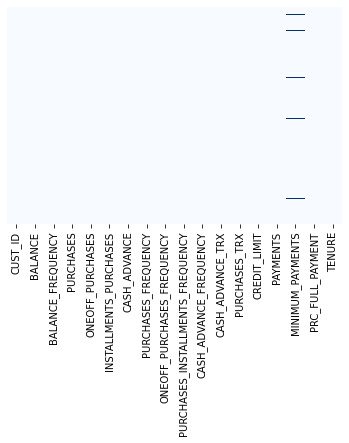

In [8]:
# visualization of dataset

sns.heatmap(cc_df.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [9]:
cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=cc_df['MINIMUM_PAYMENTS'].mean()

In [10]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=cc_df['CREDIT_LIMIT'].mean()

In [12]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Checking duplicate entry in the dataset

cc_df.duplicated().sum()

0

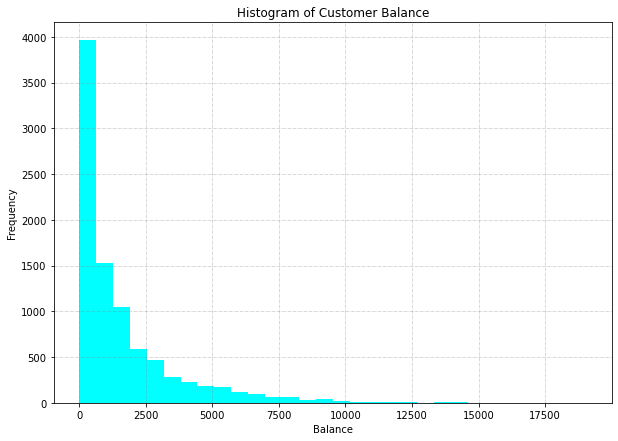

In [14]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(cc_df["BALANCE"], bins = 30, color='cyan')

ax.grid(visible=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.title('Histogram of Customer Balance')
plt.show()

### It seems most of the customers who use their Credit Card would maximize the usage of their credit balance, until it reaches 0.

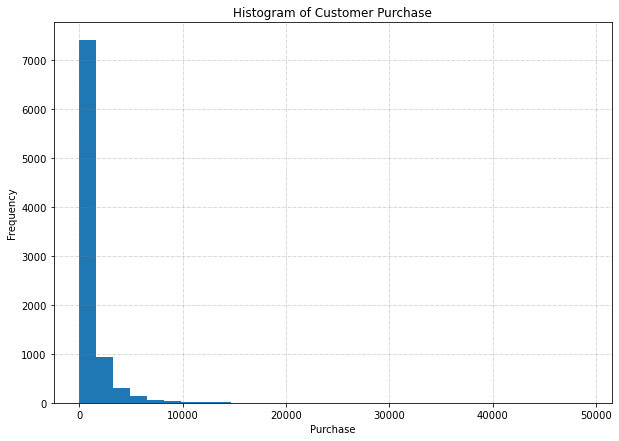

In [15]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(cc_df["PURCHASES"], bins = 30)

ax.grid(visible=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.title('Histogram of Customer Purchase')
plt.show()

### Suprisingly, most of the customers don’t use their Credit Card to purchase something.

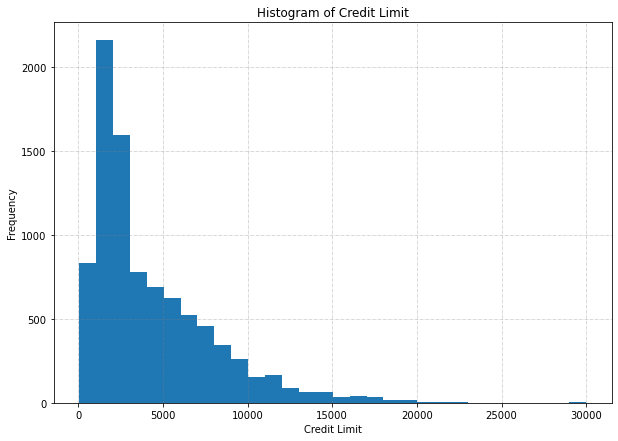

In [16]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(cc_df["CREDIT_LIMIT"], bins = 30)

ax.grid(visible=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.title('Histogram of Credit Limit')
plt.show()

### Most of the customers have Credit Limit around 2000. The frequency goes lower along with the increment of Credit Limit.

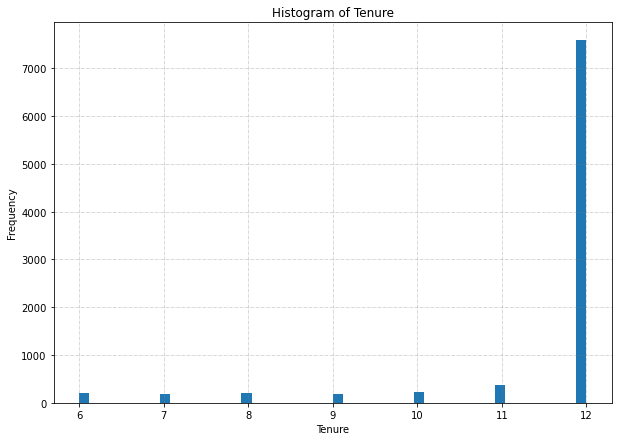

In [17]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(cc_df["TENURE"], bins = 50)

ax.grid(visible=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title('Histogram of Tenure')
plt.show()

### Most of the customers have 12 months Tenure, with significant numbers compared to other tenure.

In [18]:
 cc_df.drop("CUST_ID", axis=1, inplace=True)

In [19]:
cc_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


D:\ML_Intern_Project_1\Code_implementation\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ML_Intern_Project_1\Code_implementation\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ML_Intern_Project_1\Code_implementation\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

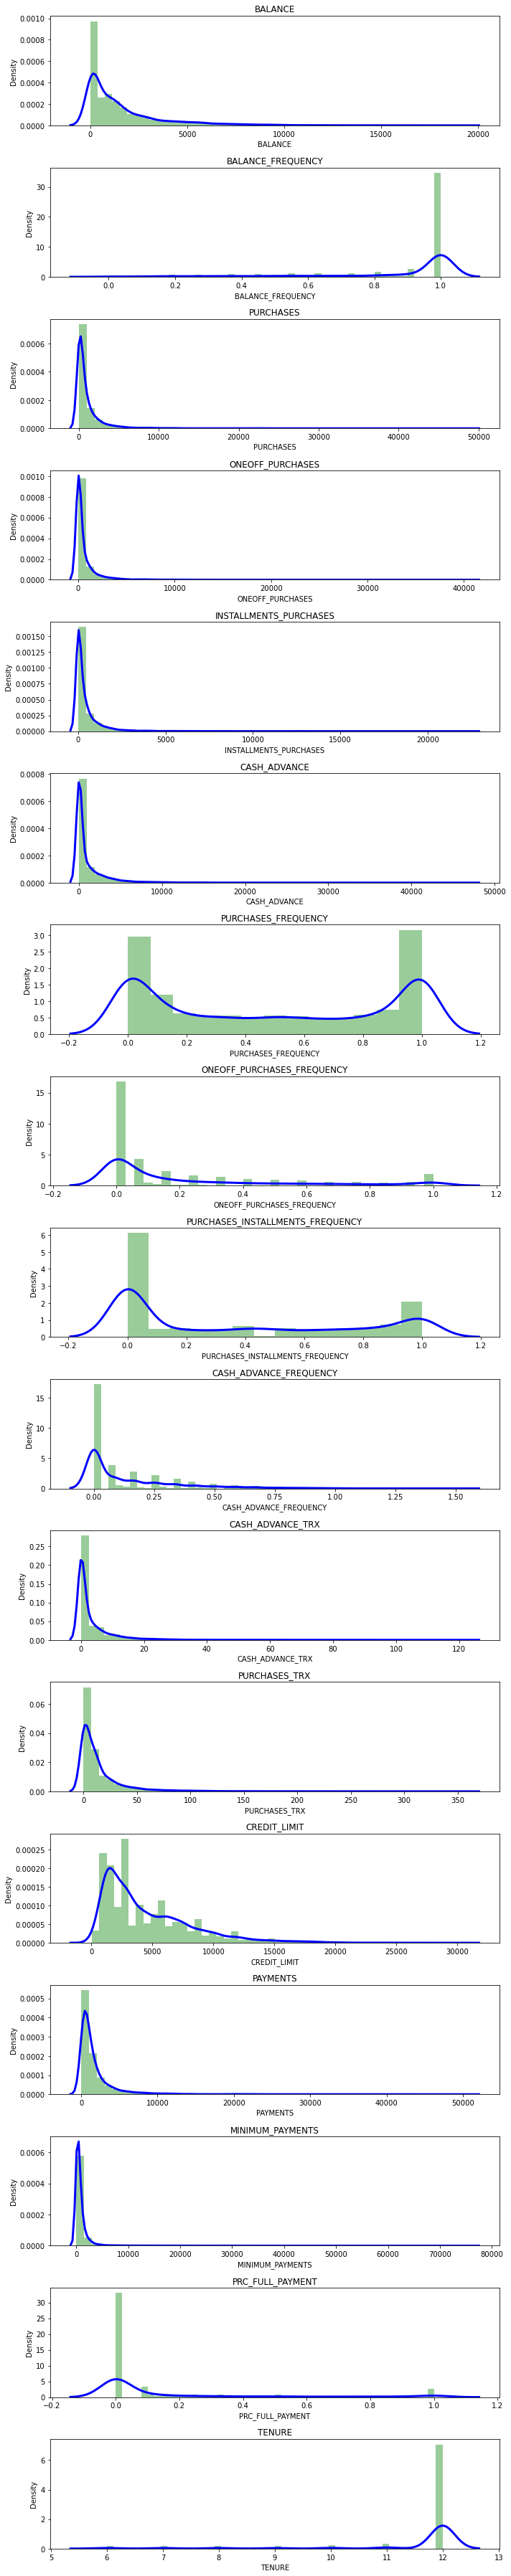

In [20]:
#distplot combination of matplotlib.hist function and seaborn kdeplot()
#KDE-Kernal density estimate
#KDE for visualising probability density of a continous variable
plt.figure(figsize=(10,50))
for i in range(len(cc_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(cc_df[cc_df.columns[i]],kde_kws={"color":"b", "lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(cc_df.columns[i]) 
    
plt.tight_layout()

<AxesSubplot:>

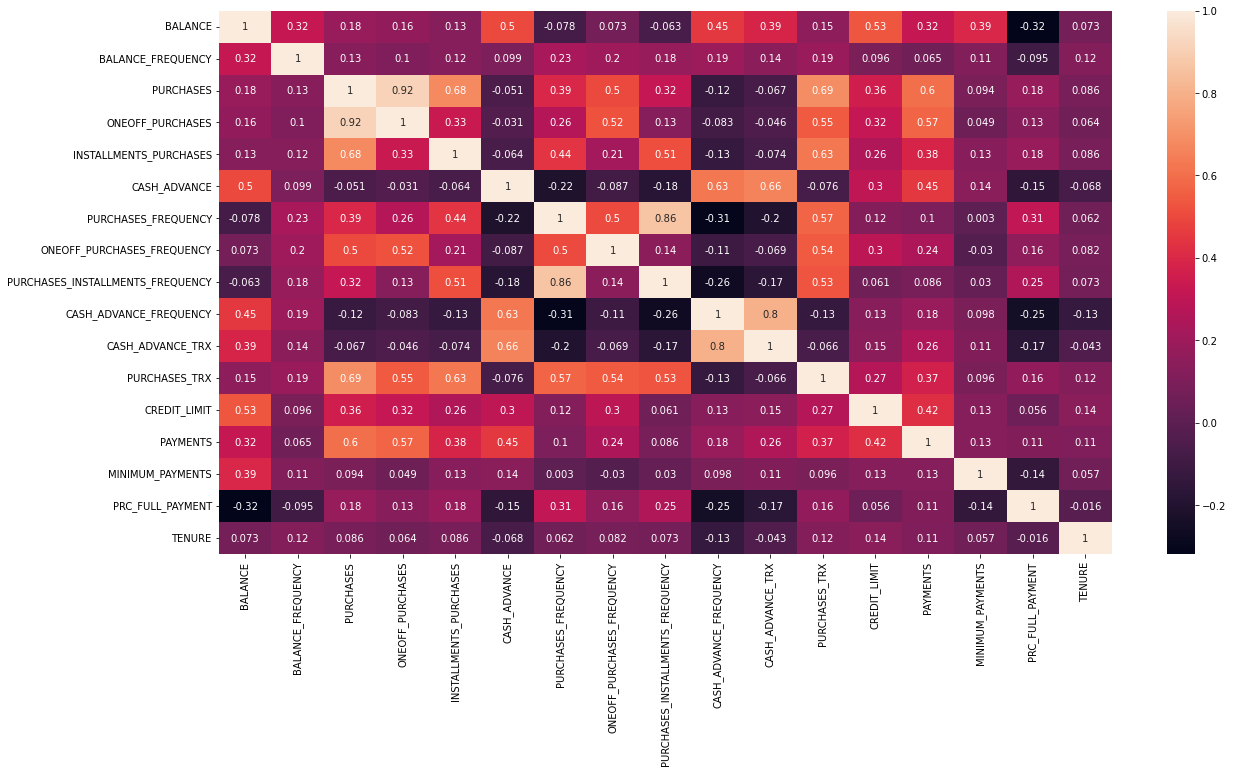

In [21]:
# COrrelation matrix between features

corr = cc_df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [22]:
# with the following function we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
# Lets check the correlated features
corr_features = correlation(cc_df, 0.79)
len(set(corr_features))
corr_features

{'CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}

In [24]:
# scale data

scaler = StandardScaler()
cc_df_scaled = scaler.fit_transform(cc_df)

In [25]:
cc_df_scaled.shape

(8950, 17)

In [26]:
cc_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

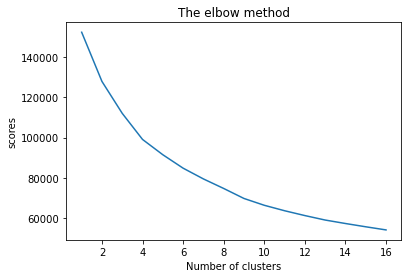

In [27]:
scores=[]

range_values = range(1,17)

for i in range_values:
    kmean = KMeans(n_clusters=i, init='k-means++',random_state=122)
    kmean.fit(cc_df_scaled)
    scores.append(kmean.inertia_)
    
plt.plot(range(1,17),scores)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.show()
    

In [28]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cc_df_scaled)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cc_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(cc_df_scaled, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.20984981580667525
For n_clusters = 3 The average silhouette_score is : 0.25111547580989396
For n_clusters = 4 The average silhouette_score is : 0.1976074492720698
For n_clusters = 5 The average silhouette_score is : 0.19336762540980337
For n_clusters = 6 The average silhouette_score is : 0.202755081788085
For n_clusters = 7 The average silhouette_score is : 0.21434094199507045
For n_clusters = 8 The average silhouette_score is : 0.21252194053506376
For n_clusters = 9 The average silhouette_score is : 0.22605897078937356


Let's take the 3 number of clusters

In [29]:
# Apply the K-Means

np.random.seed(122)
kmeans = KMeans(3)
kmeans.fit(cc_df_scaled)

label = kmeans.labels_
print(label)

[1 0 1 ... 1 1 1]


In [30]:
kmeans.cluster_centers_.shape

(3, 17)

In [31]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns = [cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.161463,0.340325,-0.290464,-0.207468,-0.305709,1.377858,-0.644545,-0.307119,-0.555630,1.559078,1.339837,-0.367625,0.599350,0.443301,0.398847,-0.410076,-0.126713
1,-0.367396,-0.177663,-0.232898,-0.204408,-0.175047,-0.309514,-0.062796,-0.234992,-0.048401,-0.334251,-0.298804,-0.243583,-0.336467,-0.284403,-0.135429,0.007045,-0.028208
2,0.318798,0.439955,1.527871,1.279683,1.261207,-0.247131,1.143105,1.559745,0.957043,-0.358687,-0.251049,1.680394,0.891538,0.835329,0.155336,0.494645,0.303246


In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)

cluster_centers = pd.DataFrame(data=cluster_centers, columns=[cc_df.columns])

cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3981.961277,0.957891,382.624762,248.083296,134.618954,3868.303195,0.231664,0.110838,0.143616,0.447132,12.392231,5.572055,6675.128161,3016.457991,1793.702161,0.033774,11.347744
1,799.771040,0.835184,505.615025,253.161504,252.774371,329.805632,0.465148,0.132355,0.345201,0.068257,1.209709,8.655280,3270.246492,909.825781,548.594759,0.155775,11.479568
2,2228.026120,0.981492,4267.525421,2716.449393,1551.561464,460.625971,0.949134,0.667760,0.744791,0.063367,1.535599,56.478155,7738.228155,4151.340126,1226.211303,0.298390,11.923139


In [33]:
cc_df_cluster = pd.concat([cc_df,pd.DataFrame({'Cluster':label})],axis=1)
cc_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


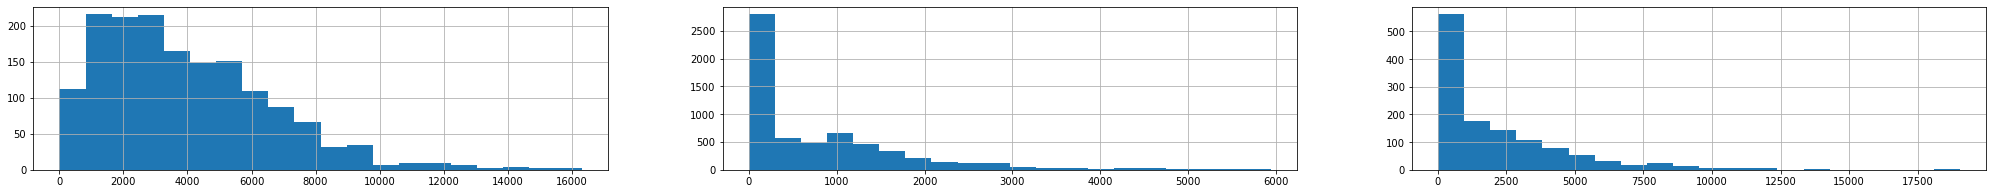

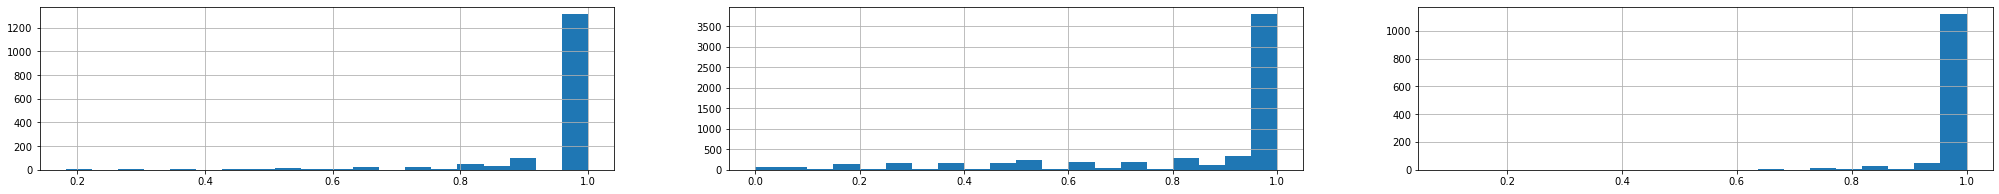

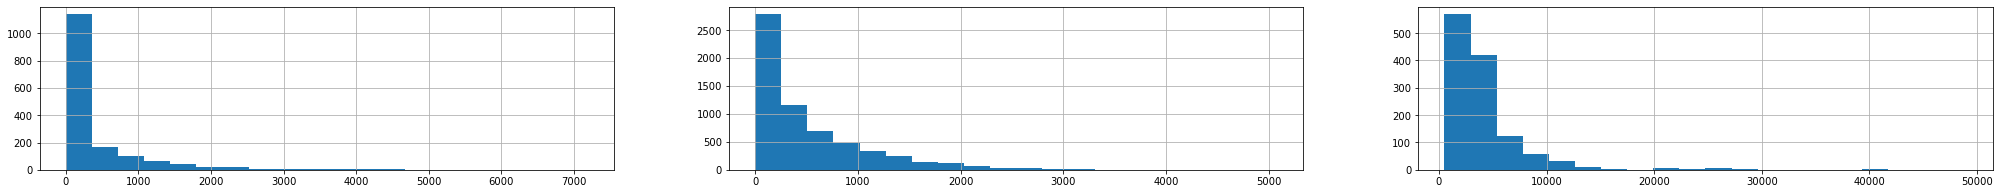

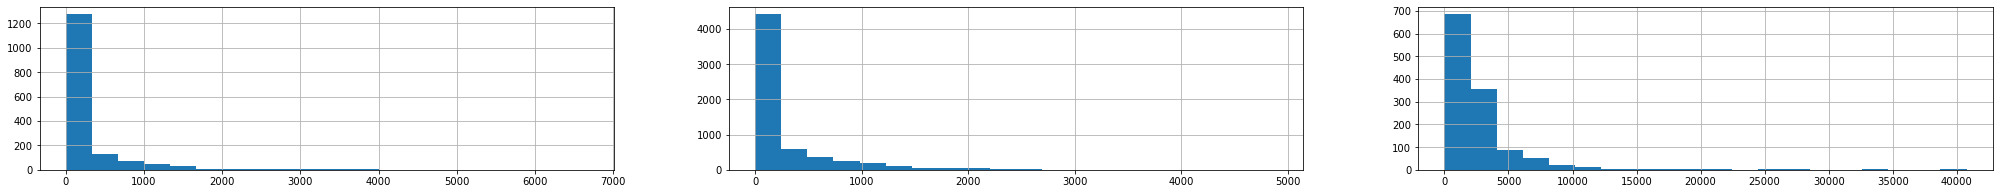

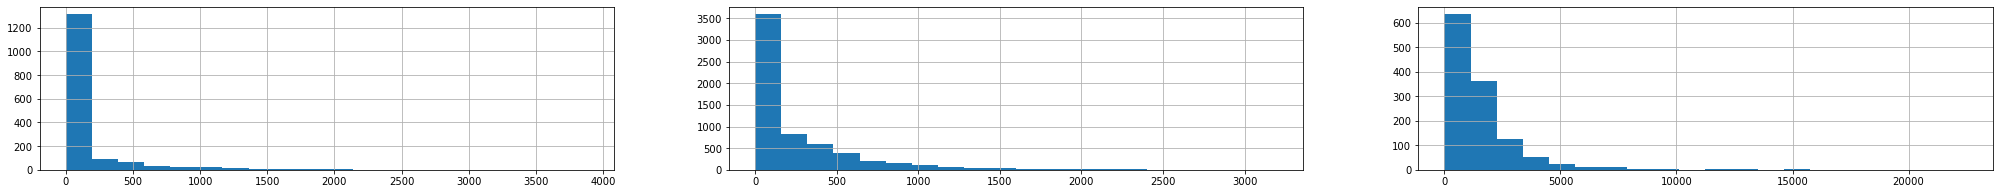

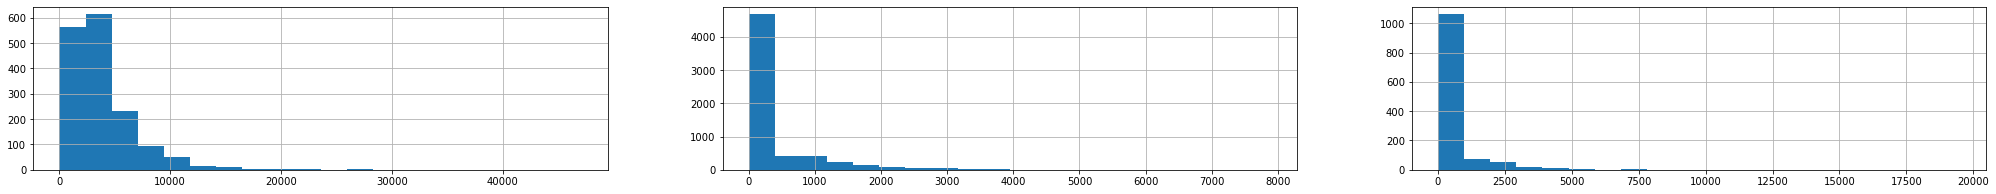

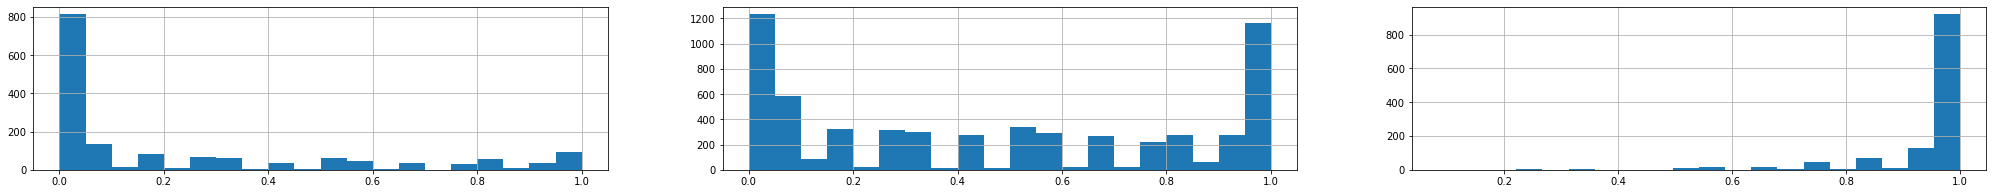

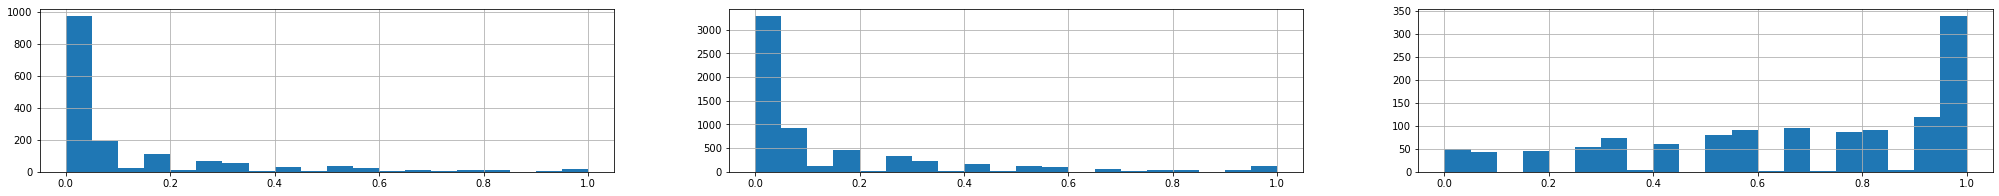

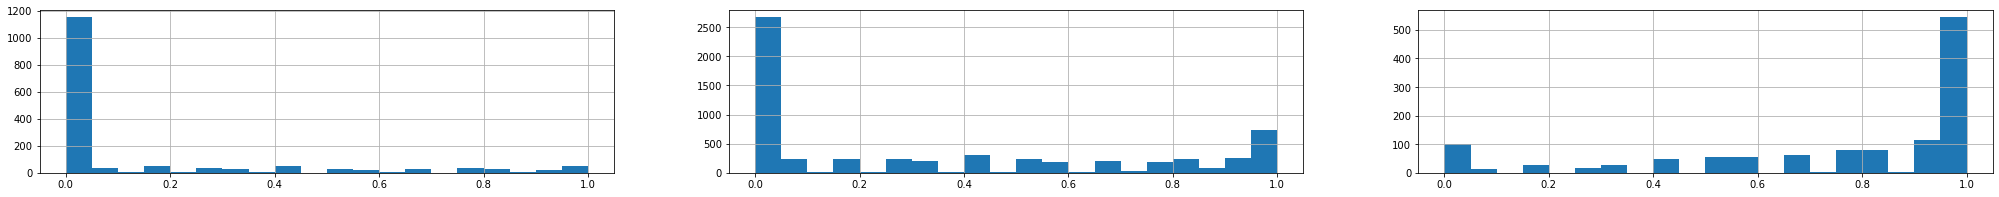

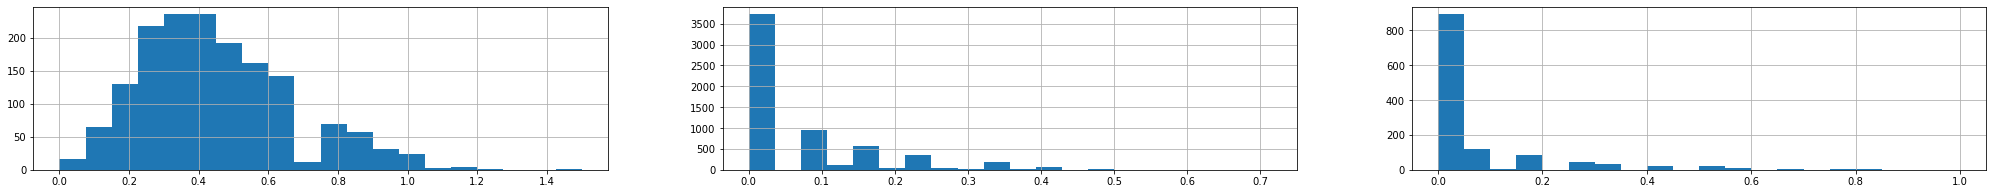

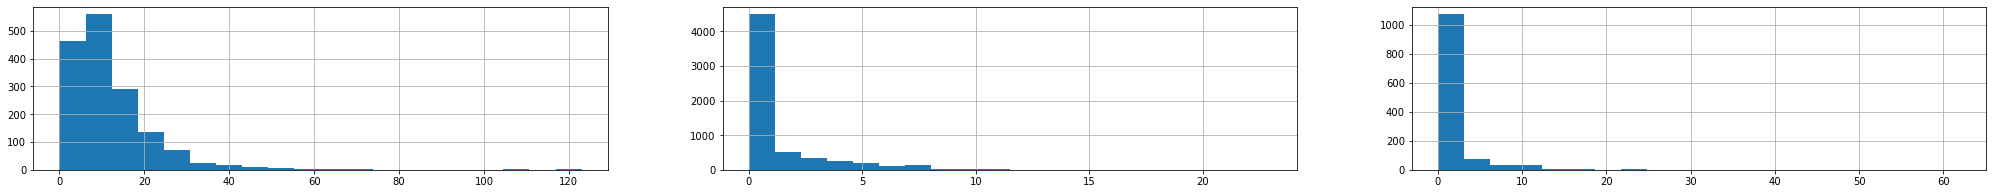

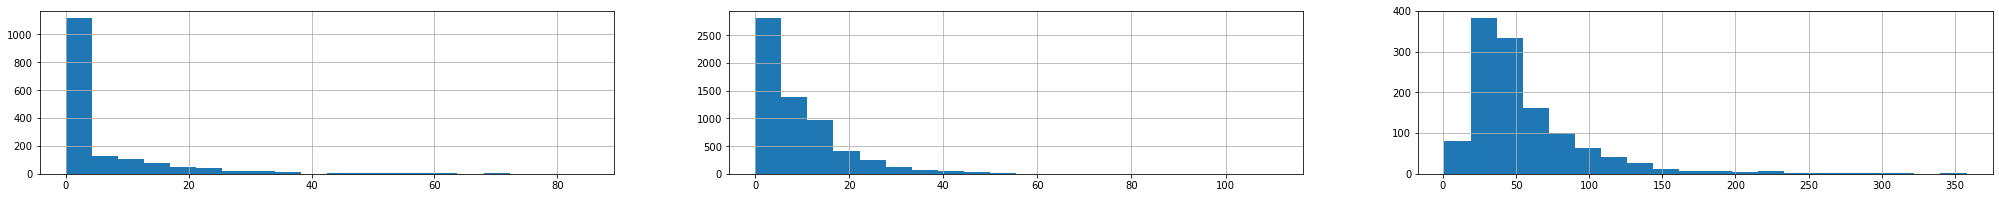

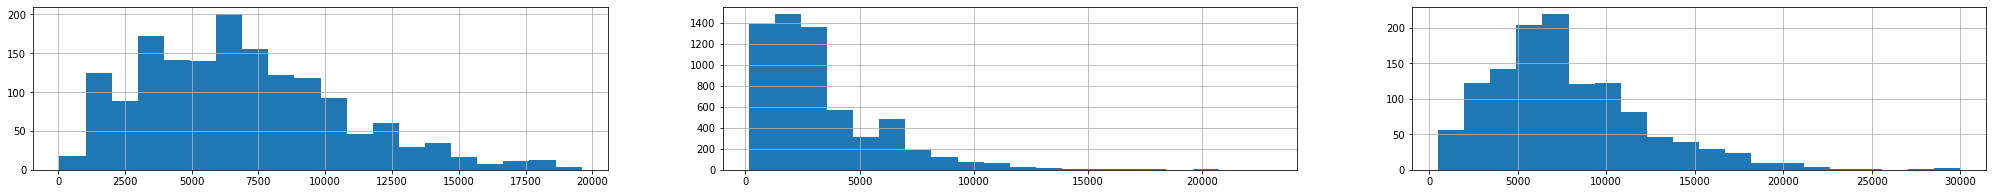

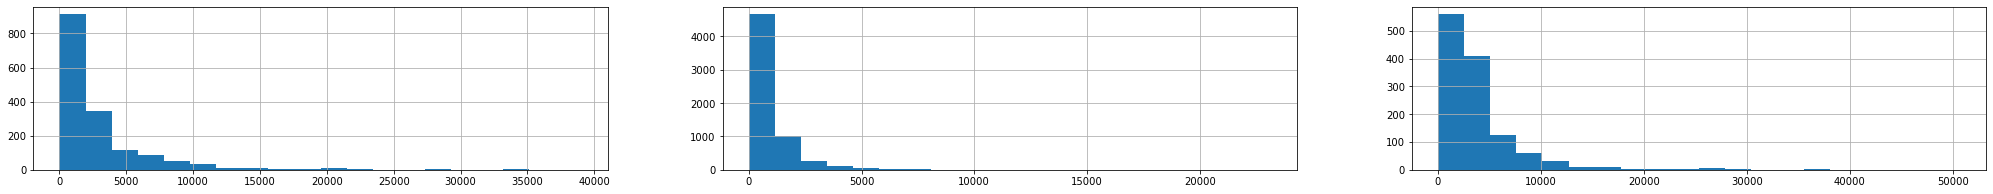

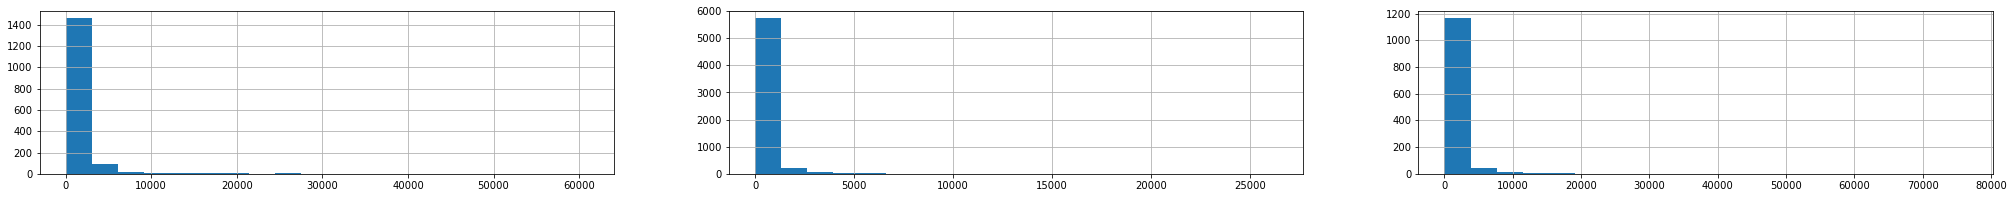

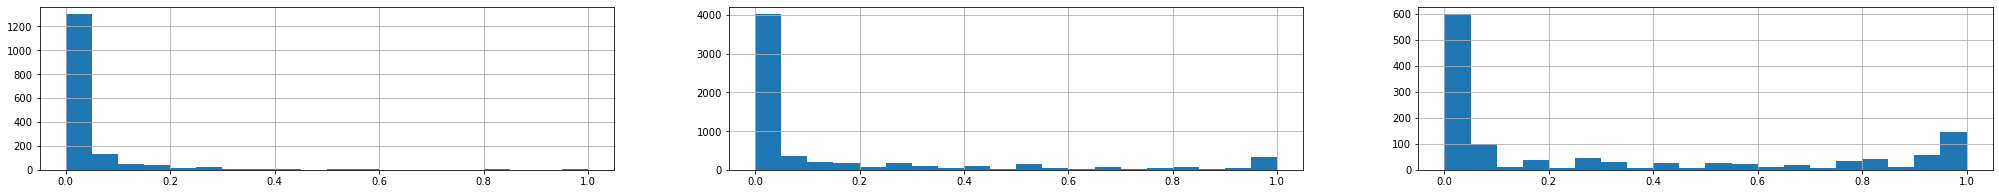

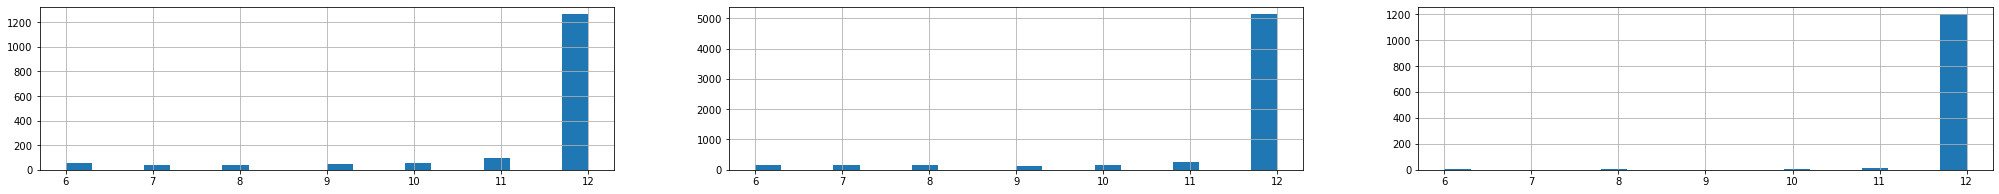

In [34]:
# Plot histogram

for i in cc_df.columns:
    plt.figure(figsize=(35,3))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = cc_df_cluster[cc_df_cluster['Cluster']==j]
        cluster[i].hist(bins=20)
        
    plt.show()

# Principal component analysis

In [35]:
# dimensionality reduction

In [36]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(cc_df_scaled)
principal_comp

array([[-1.68222121, -1.07645282],
       [-1.13829463,  2.50643337],
       [ 0.96968502, -0.3834863 ],
       ...,
       [-0.92620574, -1.81078291],
       [-2.33655442, -0.65799574],
       [-0.55642094, -0.40049004]])

In [37]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138295,2.506433
2,0.969685,-0.383486
3,-0.873625,0.043216
4,-1.599436,-0.688600
...,...,...
8945,-0.359631,-2.016146
8946,-0.564370,-1.639084
8947,-0.926206,-1.810783
8948,-2.336554,-0.657996


In [38]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':label})], axis=1)
pca_df

,pca1,pca2,Cluster
0,-1.682221,-1.076453,1
1,-1.138295,2.506433,0
2,0.969685,-0.383486,1
3,-0.873625,0.043216,1
4,-1.599436,-0.688600,1
...,...,...,...
8945,-0.359631,-2.016146,1
8946,-0.564370,-1.639084,1
8947,-0.926206,-1.810783,1
8948,-2.336554,-0.657996,1


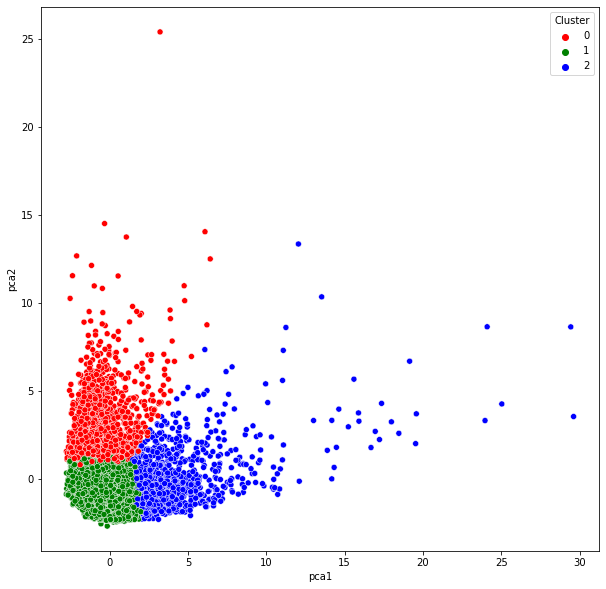

In [39]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_df, palette=['red','green','blue'])
plt.show()

* **Cluster 1** : This customer group indicates a small group of customers who have low balances, small spenders (low purchase) with the lowest credit limit.
* **Cluster 2** : This customer group indicates a large group of customers who have medium balances, spenders (high purchase) with the highest credit limit.
* **Cluster 0** : This customer group indicates a small group of customers who have high balances and cash advances, low purchase frequency with high credit limit. We can assume that this customer segment uses their credit cards as a loan.